In [3]:
#Import libraries 
import yfinance as yf
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
sp500_data = yf.download("^GSPC", start="2017-01-01", end="2022-10-16")
sp500_df = pd.DataFrame(sp500_data)
sp500_df.to_csv("sp500_data.csv")

[*********************100%***********************]  1 of 1 completed


In [5]:
dataset_train = pd.read_csv("sp500_data.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000


In [6]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[2251.57006836]
 [2261.60009766]
 [2268.17993164]
 ...
 [3590.83007812]
 [3520.37011719]
 [3690.40991211]]
(1457, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range = (0,1)) 
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set 

array([[0.        ],
       [0.00392882],
       [0.00650617],
       ...,
       [0.52459524],
       [0.4969957 ],
       [0.56360119]])

In [8]:
X_train = []

y_train = []

for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [9]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
X_train.shape 

(1198, 60, 1)

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50)) 
regressor.add(Dropout (0.2))
              
regressor.add(Dense(units=1)) 

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 48ms/step - loss: 0.0306
Epoch 2/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0043
Epoch 3/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0039
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0039
Epoch 5/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0034
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0035
Epoch 7/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0035
Epoch 8/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0032
Epoch 9/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0031
Epoch 10/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0030
Epoch 11/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0031
Epoch 13/100
38/38 [=====

38/38 [==============================] - 2s 48ms/step - loss: 8.8513e-04


In [16]:
sp500_data_test = yf.download("^GSPC", start="2022-10-16", end="2023-3-22")
sp500_df_test = pd.DataFrame(sp500_data)
sp500_df_test.to_csv("sp500_data_test.csv")

[*********************100%***********************]  1 of 1 completed


In [18]:
dataset_test = pd.read_csv("sp500_data_test.csv") 
actual_stock_price = dataset_test.iloc[:,1:2].values 

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [22]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

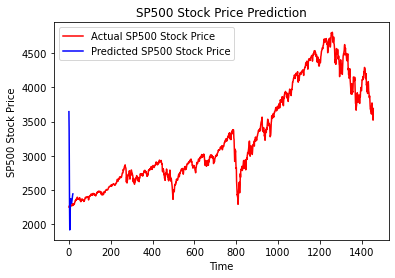

In [26]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual SP500 Stock Price') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SP500 Stock Price')
plt.title('SP500 Stock Price Prediction')
plt.xlabel('Time') 
plt.ylabel('SP500 Stock Price')
plt.legend() 